In [1]:
import datajoint as dj

In [2]:
import ephys
import matplotlib.pyplot as plt
%matplotlib inline

Connecting daveliu@mesoscale-activity.datajoint.io:3306


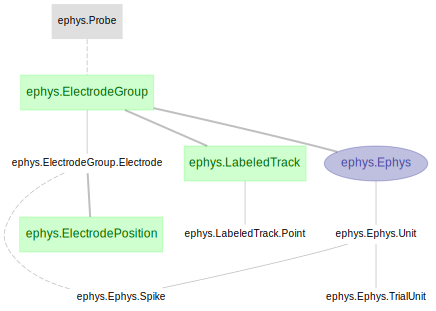

In [3]:
dj.ERD(ephys)

In [4]:
mouse=ephys.experiment.lab.Animal()
mouse

animal Janelia ANM ID (6 digits),dob
399752,2017-08-01


In [5]:
person=ephys.experiment.lab.Person()
#person.insert1(('daveliu', 'Dave Liu'))
person

username,fullname
daveliu,Dave Liu


In [6]:
rig=ephys.experiment.lab.Rig()
#rig.insert1(('TRig1', 'Training rig 1'))
rig

rig,rig_description
TRig1,Training rig 1


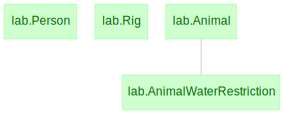

In [7]:
import lab
dj.ERD(lab)

In [8]:
animalWaterRestriction=ephys.experiment.lab.AnimalWaterRestriction()
#animalWaterRestriction.insert1((399752, 'dl7'))
animalWaterRestriction

animal Janelia ANM ID (6 digits),water_restriction water restriction number
399752,dl7


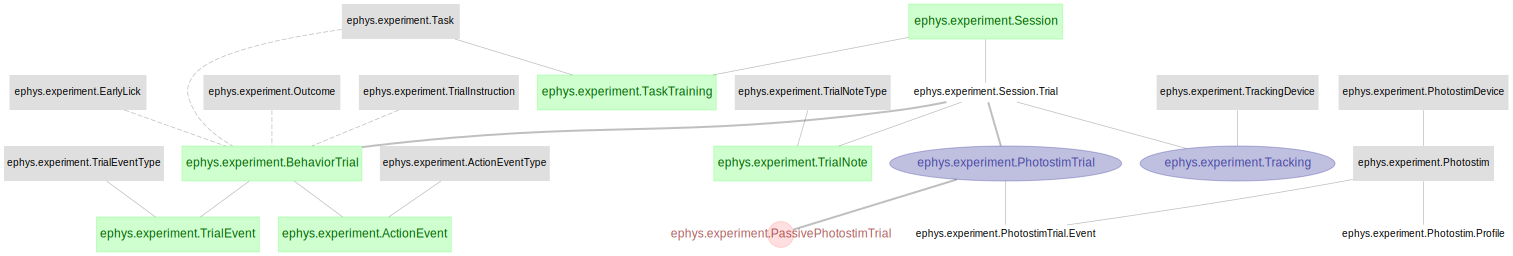

In [9]:
dj.ERD(ephys.experiment)

In [ ]:
import ingest
importedSessionFile=ingest.ImportedSessionFile()
importedSessionFileIngest = ingest.ImportedSessionFileIngest()

In [ ]:
#importedSessionFile.drop()
importedSessionFileIngest.populate()

In [ ]:
import numpy as np
x=[1,2]
np.split(x,1)

In [ ]:
sessionList = ['R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171114_144434.mat', 
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171116_123237.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171118_141139.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171119_122727.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171119_130846.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171120_132218.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171121_130431.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171122_134619.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171123_115915.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171124_120916.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171125_124353.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171126_122207.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171127_131041.mat']

In [ ]:
session=ephys.experiment.Session()
session.drop()

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
import numpy as np

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = behaviorTrial.fetch('outcome', order_by='session')
early_lick = behaviorTrial.fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = trialNote.fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
len(trial_note)

In [ ]:
lickleftAll=(155,144, 133, 144)

In [ ]:
lickleftAll=np.tile(lickleftAll,(len,1))
lickleftAll

In [ ]:
lickleft=[[1],[2]]
lickleft


In [ ]:
np.insert(lickleftAll,[4],lickleft, axis=1)